In [3]:
import pandas as pd
df = pd.read_csv("/content/phishingDTS.csv")
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Data Cleaning Step-1:Maintaing the same case for all columns

In [4]:
df.columns

Index(['index', 'url', 'length_url', 'length_hostname', 'ip', 'nb_dots',
       'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
       'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star',
       'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
       'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'punycode', 'PORT',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_suBdomains', 'prefix_suffix', 'random_dOmain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'CHAR_REPEAT', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_

In [5]:
case_col=[i.lower() for i in df.columns]
df.columns=case_col

In [6]:
df.shape

(11517, 91)

In [7]:
df.drop("index",axis=1,inplace=True)

In [8]:
df.shape

(11517, 90)

In [9]:
df.isna().sum()

url                      10
length_url               20
length_hostname          20
ip                       20
nb_dots                  20
                         ..
dns_record               20
google_index             20
page_rank                20
page_background_color    20
status                   20
Length: 90, dtype: int64

Data Cleaning Step 2:Removing null values


In [10]:
df[df['url'].isna()]

url  length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  \
515    NaN         NaN              NaN NaN      NaN         NaN    NaN   
4323   NaN         NaN              NaN NaN      NaN         NaN    NaN   
4958   NaN         NaN              NaN NaN      NaN         NaN    NaN   
5038   NaN         NaN              NaN NaN      NaN         NaN    NaN   
6620   NaN         NaN              NaN NaN      NaN         NaN    NaN   
7013   NaN         NaN              NaN NaN      NaN         NaN    NaN   
8189   NaN         NaN              NaN NaN      NaN         NaN    NaN   
8634   NaN         NaN              NaN NaN      NaN         NaN    NaN   
10213  NaN         NaN              NaN NaN      NaN         NaN    NaN   
10493  NaN         NaN              NaN NaN      NaN         NaN    NaN   

       nb_qm  nb_and  nb_or  nb_eq  nb_underscore  nb_tilde  nb_percent  \
515      NaN     NaN    NaN    NaN            NaN       NaN         NaN   
4323     NaN     NaN    NaN    NaN            NaN       NaN         NaN   
4958     NaN     NaN    NaN    NaN            NaN       NaN         NaN   
5038     NaN     NaN    NaN    NaN            NaN       NaN         NaN   
6620     NaN     NaN    NaN    NaN            NaN       NaN         NaN   
7013     NaN     NaN    NaN    NaN            NaN       NaN         NaN   
8189     NaN     NaN    NaN    NaN            NaN       NaN         NaN   
8634     NaN     NaN    NaN    NaN            NaN       NaN         NaN   
10213    NaN     NaN    NaN    NaN            NaN       NaN         NaN   
10493    NaN     NaN    NaN    NaN            NaN       NaN         NaN   

       nb_slash nb_star  nb_colon  nb_comma  nb_semicolumn  nb_dollar  \
515         NaN     NaN       NaN       NaN            NaN        NaN   
4323        NaN     NaN       NaN       NaN            NaN        NaN   
4958        NaN     NaN       NaN       NaN            NaN        NaN   
5038        NaN     NaN       NaN       NaN            NaN        NaN   
6620        NaN     NaN       NaN       NaN            NaN        NaN   
7013        NaN     NaN       NaN       NaN            NaN        NaN   
8189        NaN     NaN       NaN       NaN            NaN        NaN   
8634        NaN     NaN       NaN       NaN            NaN        NaN   
10213       NaN     NaN       NaN       NaN            NaN        NaN   
10493       NaN     NaN       NaN       NaN            NaN        NaN   

       nb_space  nb_www  nb_com  nb_dslash  http_in_path  https_token  \
515         NaN     NaN     NaN        NaN           NaN          NaN   
4323        NaN     NaN     NaN        NaN           NaN          NaN   
4958        NaN     NaN     NaN        NaN           NaN          NaN   
5038        NaN     NaN     NaN        NaN           NaN          NaN   
6620        NaN     NaN     NaN        NaN           NaN          NaN   
7013        NaN     NaN     NaN        NaN           NaN          NaN   
8189        NaN     NaN     NaN        NaN           NaN          NaN   
8634        NaN     NaN     NaN        NaN           NaN          NaN   
10213       NaN     NaN     NaN        NaN           NaN          NaN   
10493       NaN     NaN     NaN        NaN           NaN          NaN   

       ratio_digits_url  ratio_digits_host  punycode  port  tld_in_path  \
515                 NaN                NaN       NaN   NaN          NaN   
4323                NaN                NaN       NaN   NaN          NaN   
4958                NaN                NaN       NaN   NaN          NaN   
5038                NaN                NaN       NaN   NaN          NaN   
6620                NaN                NaN       NaN   NaN          NaN   
7013                NaN                NaN       NaN   NaN          NaN   
8189                NaN                NaN       NaN   NaN          NaN   
8634                NaN                NaN       NaN   NaN          NaN   
10213               NaN                NaN       NaN   NaN          NaN 

In [11]:
rows_with_no_urls=df[df['url'].isna()].index

In [12]:
df.drop(rows_with_no_urls, inplace=True)

In [13]:
df['url'].isna().sum()

0

In [14]:
df.shape

(11507, 90)

Data Cleaning Step-3:Data imputing


In [15]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [16]:
rows_with_no_url_length=df[df['length_url'].isna()].index
print(rows_with_no_url_length)

Int64Index([1046, 1755, 4245, 4387, 5815, 6926, 8178, 9499, 9666, 9765], dtype='int64')


In [17]:
a=[i.lower() for i in ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags', 'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'domain_registration_length', 'domain_age', 'web_traffic', 'dns_record', 'google_index', 'page_rank', 'status']]

In [18]:
#df.drop(rows_with_no_url_length,inplace=True)
df.loc[1046, a] = [88,20,	0,	2,	5,	0,	0,	0,	0,	0,	0,	0,	0,	6,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	0,	0,	10,	3,	3,	7,	3,	9,	8,	9,	6.6,	7.5,	6.375,	0,	0,	0,	0,	0,	0,	296,	0.972972973,	0.027027027,	0,	1,	0,	0.125,	0	,0.125,	0	,1,	84.21052632,	0,100,	0,	0,	0,	0,	90.90909091,	0,	0,	0,	0,	0,	0,	2202,	8024,	88431,	0,	0,	5,	'legitimate']
df.loc[1755, a] = [51	,24	,0	,3	,0	,0	,0	,0	,0	,0	,0	,0	,0	,4	,0	,1	,0	,0	,0	,0	,1	,0	,0	,0	,1	,0.117647059	,0	,0	,0	,0	,0	,0	,3	,0	,0	,0	,0	,2	,0	,5	,4	,3	,3	,3	,16	,16	,8	,7.2	,9.5	,5.666666667	,0	,0	,0	,0	,0	,0	,80	,0.575	,0.425	,0	,0	,0	,0.352941176	,0	,0.205882353	,0	,1	,15.38461538	,0	,50	,50	,0	,0	,0	,33.33333333	,0	,0	,0	,1	,1,	0,	103,	6106,	737,	0,	1,	6,	'legitimate']
df.loc[4245, a] = [77	,16	,0	,3	,3	,0	,0	,0	,0	,0	,1	,0	,0	,5	,0	,1	,0	,0	,0	,0	,1	,1	,0	,0	,1,	0.103896104	,0	,0	,0	,1	,0	,0	,3	,0	,0	,0	,0	,2	,0	,10	,6	,2	,3	,2	,10	,8	,10	,5.7	,5.5	,5.75	,0	,0	,0	,0	,0	,0	,85	,0.929411765	,0.070588235	,0	,0	,0	,0	,0	,0.166666667	,0	,0	,87.5	,0	,66.66666667	,33.33333333	,0	,0	,0	,0	,0	,0	,0	,1	,1	,0	,120	,9010	,446919	,0	,1	,5	,'legitimate']
df.loc[4387, a] = [114	,29	,0	,2	,2	,0	,0	,0	,0	,0	,1	,0	,0	,9	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0	,1	,0.096491228,	0.206896552	,0	,0	,0	,0	,0	,2	,1	,0	,0	,0	,0	,0	,12	,5	,4	,6	,4	,13	,11	,13	,7.666666667	,7.666666667	,7.666666667	,4	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,1	,1	,0	,0	,658	,4089	,0	,0	,1	,4	,'phishing']
df.loc[5815, a] = [238	,17	,1	,3	,8	,0	,1	,3	,0	,4	,1	,0	,11	,3	,0	,1	,0	,0	,0	,3	,0	,0	,0	,0	,0	,0.31512605	,0	,0	,0	,0	,0,0	,3	,0	,0	,0	,0	,0	,0	,31	,9	,2	,4	,2	,16	,8	,16	,6.290322581	,6	,6.310344828	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,1	,0	,0	,158	,9338	,21	,0	,0	,5,	'phishing']
df.loc[6926, a] = [30	,23	,0	,2	,0	,0	,0	,0	,0	,0	,0	,0	,0	,2	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0,	1,	0,	0,	0,	0,	0,	0,	0,	2	,0	,0	,0	,0	,1,	0	,2	,0	,6	,6	,0	,12	,12	,0	,9	,9	,0	,0	,1	,0	,0	,0	,0	,12	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0	,100	,0	,0	,0	,0	,0	,0	,100	,0	,0	,0	,1	,0	,0	,1049	,5159	,1488031	,0	,0	,8	,'legitimate']

df.loc[8178, a] = [23	,14	,0	,2	,0	,0	,0	,0	,0	,0	,0	,0	,0	,3	,0	,1	,0	,0	,0	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,2	,0	,1	,0	,0	,0	,0	,2	,3	,3	,3	,0	,7	,7	,0	,5	,5	,0	,0	,0	,0	,0	,0	,0	,62	,0.919354839,	0.080645161	,0	,0	,0	,0.2	,0	,0	,0,	0,	88.88888889	,0	,88.88888889	,11.11111111	,0	,0	,0,	50	,0	,0	,0	,0	,1,	0	,2026	,3088	,2628104	,0	,0,	2	,'legitimate']

df.loc[9499, a] = [45	,11	,0	,3,	0,0	,0	,0	,0	,0	,0	,0	,0	,5	,0	,1	,0	,0	,0	,0	,1	,0	,0	,0	,0	,0.133333333	,0	,0	,0	,0	,0	,0	,3	,0	,1	,0	,0	,0	,0	,6	,4	,3	,3	,3	,9	,3	,9	,4.666666667	,3	,5.5	,0	,0	,0	,0	,0	,0	,420	,0.976190476,	0.023809524	,0	,0	,0	,0.1,	0,	0,	0	,0	,94.73684211	,0	,80.95238095	,19.04761905	,0	,0	,0	,94.68085106	,1	,0	,0	,1	,0	,0	,0	,-1	,6431	,0	,0	,6	,'legitimate']
df.loc[9666, a] =[16	,7	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0	,3	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,1	,0	,0	,0	,0	,0	,0	,1	,0	,4	,4	,0	,4	,4	,0	,4	,4	,0	,0	,0	,0	,0	,0	,0	,13	,0.538461538	,0.461538462	,0	,1	,0	,0	,0	,0	,0	,1	,66.66666667	,0,	0,	0,	0,	0,	0,	78.57142857	,0	,0	,0	,0	,0	,0	,0	,6001	,9363234	,0	,0,	3,	'legitimate']
df.loc[9765, a] =[152,	13	,0	,2	,20	,0	,0	,0	,0	,0	,0	,0	,0	,3	,0	,1	,0	,0	,0	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,2	,0	,0	,0	,0	,0	,0	,23	,4	,1	,3	,1	,11	,5	,11,	5.130434783,	4,	5.238095238	,0	,0	,0	,0	,0	,0	,17,	0,	1,	0	,1	,0	,0	,0	,0	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,1343	,7422	,286	,0	,1	,7	,'legitimate']

In [19]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

Data Cleaning Step 4:Removing unwanted coloumn

In [20]:
#page background color is of no importance for us.
df.drop("page_background_color",axis=1,inplace=True)

In [21]:
df.shape

(11507, 89)

Data Cleaning Step 5:Removing duplicate values

In [22]:
df.duplicated().sum()

77

In [23]:
df[df.duplicated()]

url  length_url  \
11420  https://www.manualslib.com/manual/680220/Sierr...       105.0   
11421  http://grup-bokepwa-terbaru90.000webhostapp.co...        57.0   
11422                  https://www.balonnebeacon.com.au/        33.0   
11423  https://inspirationlab.wordpress.com/2010/04/1...        71.0   
11424                          https://www.addtoany.com/        25.0   
...                                                  ...         ...   
11492  http://tokyodreamhouse.com/1122//?sec=iBusines...        58.0   
11493  http://icyte.com/snapshots/show/05deeb7f5c0c21...        72.0   
11494        http://www.iplocationfinder.com/mp3clan.com        43.0   
11495  http://iqfilms.com/Auth/57dfaaed925987a1c0b5f3...       101.0   
11496  http://www.templestudy.com/2008/02/26/a-12th-c...        85.0   

       length_hostname   ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
11420             18.0  0.0      3.0         7.0    0.0    0.0     0.0    0.0   
11421             40.0  0.0      3.0         2.0    0.0    0.0     0.0    0.0   
11422             24.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
11423             28.0  0.0      2.0         4.0    0.0    0.0     0.0    0.0   
11424             16.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
...                ...  ...      ...         ...    ...    ...     ...    ...   
11492             19.0  0.0      1.0         0.0    0.0    1.0     0.0    0.0   
11493              9.0  1.0      1.0         0.0    0.0    0.0     0.0    0.0   
11494             24.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
11495             11.0  1.0      1.0         0.0    0.0    0.0     0.0    0.0   
11496             19.0  0.0      2.0         7.0    0.0    0.0     0.0    0.0   

       nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash nb_star  nb_colon  \
11420    0.0            0.0       0.0         0.0       5.0    Zero       1.0   
11421    0.0            0.0       0.0         0.0       3.0    Zero       1.0   
11422    0.0            0.0       0.0         0.0       3.0    Zero       1.0   
11423    0.0            0.0       0.0         0.0       7.0    Zero       1.0   
11424    0.0            0.0       0.0         0.0       3.0    Zero       1.0   
...      ...            ...       ...         ...       ...     ...       ...   
11492    1.0            0.0       0.0         1.0       5.0    Zero       1.0   
11493    0.0            0.0       0.0         0.0       5.0    Zero       1.0   
11494    0.0            0.0       0.0         0.0       3.0    Zero       1.0   
11495    1.0            0.0       0.0         0.0       5.0    Zero       1.0   
11496    0.0            0.0       0.0         0.0       7.0    Zero       1.0   

       nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  \
11420       0.0            0.0        0.0       0.0     1.0     0.0   
11421       0.0            0.0        0.0       0.0     0.0     0.0   
11422       0.0            0.0        0.0       0.0     1.0     0.0   
11423       0.0            0.0        0.0       0.0     0.0     0.0   
11424       0.0            0.0        0.0       0.0     1.0     0.0   
...         ...            ...        ...       ...     ...     ...   
11492       0.0            0.0        0.0       1.0     0.0     0.0   
11493       0.0            0.0        0.0       0.0     0.0     0.0   
11494       0.0            0.0        0.0       0.0     1.0     1.0   
11495       0.0            0.0        0.0       0.0     0.0     0.0   
11496       0.0            0.0        0.0       0.0     1.0     0.0   

       nb_dslash  http_in_path  https_token  ratio_digits_url  \
11420        0.0           0.0          0.0          0.057143   
11421        0.0           0.0          1.0          0.087719   
11422        0.0           0.0          0.0          0.000000   
11423        0.0           0.0          0.0          0.112676   
11424        0.0           0.0          0.0          0.000000   

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(11430, 89)

In [26]:
df.head()
# nb_star

url  length_url  \
0              http://www.crestonwood.com/router.php        37.0   
1  http://shadetreetechnology.com/V4/validation/a...        77.0   
2  https://support-appleld.com.secureupdate.duila...       126.0   
3                                 http://rgipt.ac.in        18.0   
4  http://www.iracing.com/tracks/gateway-motorspo...        55.0   

   length_hostname   ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0             19.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
1             23.0  1.0      1.0         0.0    0.0    0.0     0.0    0.0   
2             50.0  1.0      4.0         1.0    0.0    1.0     2.0    0.0   
3             11.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
4             15.0  0.0      2.0         2.0    0.0    0.0     0.0    0.0   

   nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash nb_star  nb_colon  \
0    0.0            0.0       0.0         0.0       3.0    Zero       1.0   
1    0.0            0.0       0.0         0.0       5.0    Zero       1.0   
2    3.0            2.0       0.0         0.0       5.0    Zero       1.0   
3    0.0            0.0       0.0         0.0       2.0    Zero       1.0   
4    0.0            0.0       0.0         0.0       5.0    Zero       1.0   

   nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  nb_dslash  \
0       0.0            0.0        0.0       0.0     1.0     0.0        0.0   
1       0.0            0.0        0.0       0.0     0.0     0.0        0.0   
2       0.0            0.0        0.0       0.0     0.0     1.0        0.0   
3       0.0            0.0        0.0       0.0     0.0     0.0        0.0   
4       0.0            0.0        0.0       0.0     1.0     0.0        0.0   

   http_in_path  https_token  ratio_digits_url  ratio_digits_host  punycode  \
0           0.0          1.0          0.000000                0.0       0.0   
1           0.0          1.0          0.220779                0.0       0.0   
2           0.0          0.0          0.150794                0.0       0.0   
3           0.0          1.0          0.000000                0.0       0.0   
4           0.0          1.0          0.000000                0.0       0.0   

   port  tld_in_path  tld_in_subdomain  abnormal_subdomain  nb_subdomains  \
0   0.0          0.0               0.0                 0.0            3.0   
1   0.0          0.0               0.0                 0.0            1.0   
2   0.0          0.0               1.0                 0.0            3.0   
3   0.0          0.0               0.0                 0.0            2.0   
4   0.0          0.0               0.0                 0.0            2.0   

   prefix_suffix  random_domain  shortening_service  path_extension  \
0            0.0            0.0                 0.0             0.0   
1            0.0            0.0                 0.0             0.0   
2            1.0            0.0                 0.0             0.0   
3            0.0            0.0                 0.0             0.0   
4            0.0            0.0                 0.0             0.0   

   nb_redirection  nb_external_redirection  length_words_raw  char_repeat  \
0             0.0                      0.0               4.0          4.0   
1             1.0                      0.0               4.0          4.0   
2             1.0                      0.0              12.0          2.0   
3             1.0                      0.0               1.0          0.0   
4             1.0                      0.0               6.0          3.0   

   shortest_words_raw  shortest_word_host  shortest_word_path  \
0                 3.0                 3.0                 3.0   
1                 2.0                19.0                 2.0   
2                 2.0                 3.0                 2.0   
3                 5.0                 5.0                 0.0   
4                 3.0                 3.0                 4.0   

   longest_words_raw  long

Data Cleaning Step 6:Doing typecasting

In [27]:
df['nb_star'].value_counts()

Zero    11412
0          10
One         8
Name: nb_star, dtype: int64

In [28]:
df['nb_star']=df['nb_star'].map({'Zero':0,"One":1})

In [29]:
df['nb_star'].value_counts()

0.0    11412
1.0        8
Name: nb_star, dtype: int64

In [30]:
df['status']

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11512    legitimate
11513    legitimate
11514      phishing
11515    legitimate
11516    legitimate
Name: status, Length: 11430, dtype: object

Data Cleaning Step 7:One hot Encoding

In [31]:
df=pd.get_dummies(df,columns=['status'])

In [32]:
df.drop("status_phishing",axis=1,inplace=True)

In [33]:
df.rename(columns={'status_legitimate':'is_legitimate'},inplace=True)

In [34]:
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php        37.0   
1  http://shadetreetechnology.com/V4/validation/a...        77.0   
2  https://support-appleld.com.secureupdate.duila...       126.0   
3                                 http://rgipt.ac.in        18.0   
4  http://www.iracing.com/tracks/gateway-motorspo...        55.0   

   length_hostname   ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0             19.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
1             23.0  1.0      1.0         0.0    0.0    0.0     0.0    0.0   
2             50.0  1.0      4.0         1.0    0.0    1.0     2.0    0.0   
3             11.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
4             15.0  0.0      2.0         2.0    0.0    0.0     0.0    0.0   

   nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  nb_colon  \
0    0.0            0.0       0.0         0.0       3.0      0.0       1.0   
1    0.0            0.0       0.0         0.0       5.0      0.0       1.0   
2    3.0            2.0       0.0         0.0       5.0      0.0       1.0   
3    0.0            0.0       0.0         0.0       2.0      0.0       1.0   
4    0.0            0.0       0.0         0.0       5.0      0.0       1.0   

   nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  nb_dslash  \
0       0.0            0.0        0.0       0.0     1.0     0.0        0.0   
1       0.0            0.0        0.0       0.0     0.0     0.0        0.0   
2       0.0            0.0        0.0       0.0     0.0     1.0        0.0   
3       0.0            0.0        0.0       0.0     0.0     0.0        0.0   
4       0.0            0.0        0.0       0.0     1.0     0.0        0.0   

   http_in_path  https_token  ratio_digits_url  ratio_digits_host  punycode  \
0           0.0          1.0          0.000000                0.0       0.0   
1           0.0          1.0          0.220779                0.0       0.0   
2           0.0          0.0          0.150794                0.0       0.0   
3           0.0          1.0          0.000000                0.0       0.0   
4           0.0          1.0          0.000000                0.0       0.0   

   port  tld_in_path  tld_in_subdomain  abnormal_subdomain  nb_subdomains  \
0   0.0          0.0               0.0                 0.0            3.0   
1   0.0          0.0               0.0                 0.0            1.0   
2   0.0          0.0               1.0                 0.0            3.0   
3   0.0          0.0               0.0                 0.0            2.0   
4   0.0          0.0               0.0                 0.0            2.0   

   prefix_suffix  random_domain  shortening_service  path_extension  \
0            0.0            0.0                 0.0             0.0   
1            0.0            0.0                 0.0             0.0   
2            1.0            0.0                 0.0             0.0   
3            0.0            0.0                 0.0             0.0   
4            0.0            0.0                 0.0             0.0   

   nb_redirection  nb_external_redirection  length_words_raw  char_repeat  \
0             0.0                      0.0               4.0          4.0   
1             1.0                      0.0               4.0          4.0   
2             1.0                      0.0              12.0          2.0   
3             1.0                      0.0               1.0          0.0   
4             1.0                      0.0               6.0          3.0   

   shortest_words_raw  shortest_word_host  shortest_word_path  \
0                 3.0                 3.0                 3.0   
1                 2.0                19.0                 2.0   
2                 2.0                 3.0                 2.0   
3                 5.0                 5.0                 0.0   
4                 3.0                 3.0                 4.0   

   longest_words_raw

In [35]:
df_just_a_saver=df.copy()

In [36]:
df

url  length_url  \
0                  http://www.crestonwood.com/router.php        37.0   
1      http://shadetreetechnology.com/V4/validation/a...        77.0   
2      https://support-appleld.com.secureupdate.duila...       126.0   
3                                     http://rgipt.ac.in        18.0   
4      http://www.iracing.com/tracks/gateway-motorspo...        55.0   
...                                                  ...         ...   
11512                          https://www.ecotel.co.za/        25.0   
11513                           https://www.recetin.com/        24.0   
11514           https://charlydejadefumar.com/now/3d/3d/        40.0   
11515                     https://www.studyincanada.com/        30.0   
11516                             http://www.aguitar.ru/        22.0   

       length_hostname   ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                 19.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
1                 23.0  1.0      1.0         0.0    0.0    0.0     0.0    0.0   
2                 50.0  1.0      4.0         1.0    0.0    1.0     2.0    0.0   
3                 11.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
4                 15.0  0.0      2.0         2.0    0.0    0.0     0.0    0.0   
...                ...  ...      ...         ...    ...    ...     ...    ...   
11512             16.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
11513             15.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
11514             21.0  0.0      1.0         0.0    0.0    0.0     0.0    0.0   
11515             21.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
11516             14.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   

       nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  \
0        0.0            0.0       0.0         0.0       3.0      0.0   
1        0.0            0.0       0.0         0.0       5.0      0.0   
2        3.0            2.0       0.0         0.0       5.0      0.0   
3        0.0            0.0       0.0         0.0       2.0      0.0   
4        0.0            0.0       0.0         0.0       5.0      0.0   
...      ...            ...       ...         ...       ...      ...   
11512    0.0            0.0       0.0         0.0       3.0      0.0   
11513    0.0            0.0       0.0         0.0       3.0      0.0   
11514    0.0            0.0       0.0         0.0       6.0      0.0   
11515    0.0            0.0       0.0         0.0       3.0      0.0   
11516    0.0            0.0       0.0         0.0       3.0      0.0   

       nb_colon  nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  \
0           1.0       0.0            0.0        0.0       0.0     1.0     0.0   
1           1.0       0.0            0.0        0.0       0.0     0.0     0.0   
2           1.0       0.0            0.0        0.0       0.0     0.0     1.0   
3           1.0       0.0            0.0        0.0       0.0     0.0     0.0   
4           1.0       0.0            0.0        0.0       0.0     1.0     0.0   
...         ...       ...            ...        ...       ...     ...     ...   
11512       1.0       0.0            0.0        0.0       0.0     1.0     0.0   
11513       1.0       0.0            0.0        0.0       0.0     1.0     0.0   
11514       1.0       0.0            0.0        0.0       0.0     0.0     0.0   
11515       1.0       0.0            0.0        0.0       0.0     1.0     0.0   
11516       1.0       0.0            0.0        0.0       0.0     1.0     0.0   

       nb_dslash  http_in_path  https_token  ratio_digits_url  \
0            0.0           0.0          1.0          0.000000   
1            0.0           0.0          1.0          0.220779   
2            0.0           0.0          0.0          0.150794   
3            0.0           0.0          1.0          0.000000   
4            0.0           0.0          1.0         

Data Cleaning Step 8:Drop and Change values of -1, -2, -12 for domain_age attribute - replace with NULL
-1 - domain API Request failure


In [37]:
df[df['domain_age'] == -1]

url  length_url  \
0                  http://www.crestonwood.com/router.php        37.0   
3                                     http://rgipt.ac.in        18.0   
5                       http://appleid.apple.com-app.es/        32.0   
10     https://www.astrologyonline.eu/Astro_MemoNew/P...        56.0   
29     http://www.inbioma.pe/rechnung-376440790464490...       163.0   
...                                                  ...         ...   
11505      http://coolasmustard.com/detail/hdmi-splitter        45.0   
11506                     https://www.onlinebaufuchs.de/        30.0   
11507  https://301.es/?http://particulierca-appcasecu...        90.0   
11511  https://giaanhvu.com.vn/wp-content/languages/p...        68.0   
11515                     https://www.studyincanada.com/        30.0   

       length_hostname   ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                 19.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
3                 11.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
5                 24.0  0.0      3.0         1.0    0.0    0.0     0.0    0.0   
10                22.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
29                14.0  1.0      4.0         9.0    1.0    0.0     2.0    0.0   
...                ...  ...      ...         ...    ...    ...     ...    ...   
11505             17.0  0.0      1.0         1.0    0.0    0.0     0.0    0.0   
11506             21.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
11507              6.0  1.0      6.0         1.0    0.0    1.0     0.0    0.0   
11511             15.0  0.0      2.0         1.0    0.0    0.0     0.0    0.0   
11515             21.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   

       nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  \
0        0.0            0.0       0.0         0.0       3.0      0.0   
3        0.0            0.0       0.0         0.0       2.0      0.0   
5        0.0            0.0       0.0         0.0       3.0      0.0   
10       0.0            1.0       0.0         0.0       4.0      0.0   
29       1.0            0.0       0.0         0.0       3.0      0.0   
...      ...            ...       ...         ...       ...      ...   
11505    0.0            0.0       0.0         0.0       4.0      0.0   
11506    0.0            0.0       0.0         0.0       3.0      0.0   
11507    0.0            0.0       0.0         0.0       5.0      0.0   
11511    0.0            0.0       0.0         0.0       6.0      0.0   
11515    0.0            0.0       0.0         0.0       3.0      0.0   

       nb_colon  nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  \
0           1.0       0.0            0.0        0.0       0.0     1.0     0.0   
3           1.0       0.0            0.0        0.0       0.0     0.0     0.0   
5           1.0       0.0            0.0        0.0       0.0     0.0     1.0   
10          1.0       0.0            0.0        0.0       0.0     1.0     0.0   
29          1.0       0.0            2.0        0.0       0.0     1.0     0.0   
...         ...       ...            ...        ...       ...     ...     ...   
11505       1.0       0.0            0.0        0.0       0.0     0.0     0.0   
11506       1.0       0.0            0.0        0.0       0.0     1.0     0.0   
11507       2.0       0.0            0.0        0.0       0.0     0.0     0.0   
11511       1.0       0.0            0.0        0.0       0.0     0.0     0.0   
11515       1.0       0.0            0.0        0.0       0.0     1.0     0.0   

       nb_dslash  http_in_path  https_token  ratio_digits_url  \
0            0.0           0.0          1.0          0.000000   
3            0.0           0.0          1.0          0.000000   
5            0.0           0.0          1.0          0.000000   
10           0.0           0.0          0.0          0.000000   
29           0.0           0.0          1.0         

In [38]:
df.loc[df['domain_age'] == -1, 'domain_age'] = np.NAN
df.loc[df['domain_age'] == -2, 'domain_age'] = np.NAN
df.loc[df['domain_age'] == -12, 'domain_age'] = np.NAN

In [39]:
df.loc[df['domain_registration_length'] == -1, 'domain_registration_length'] = np.NAN

In [40]:
df

url  length_url  \
0                  http://www.crestonwood.com/router.php        37.0   
1      http://shadetreetechnology.com/V4/validation/a...        77.0   
2      https://support-appleld.com.secureupdate.duila...       126.0   
3                                     http://rgipt.ac.in        18.0   
4      http://www.iracing.com/tracks/gateway-motorspo...        55.0   
...                                                  ...         ...   
11512                          https://www.ecotel.co.za/        25.0   
11513                           https://www.recetin.com/        24.0   
11514           https://charlydejadefumar.com/now/3d/3d/        40.0   
11515                     https://www.studyincanada.com/        30.0   
11516                             http://www.aguitar.ru/        22.0   

       length_hostname   ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                 19.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
1                 23.0  1.0      1.0         0.0    0.0    0.0     0.0    0.0   
2                 50.0  1.0      4.0         1.0    0.0    1.0     2.0    0.0   
3                 11.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
4                 15.0  0.0      2.0         2.0    0.0    0.0     0.0    0.0   
...                ...  ...      ...         ...    ...    ...     ...    ...   
11512             16.0  0.0      3.0         0.0    0.0    0.0     0.0    0.0   
11513             15.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
11514             21.0  0.0      1.0         0.0    0.0    0.0     0.0    0.0   
11515             21.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   
11516             14.0  0.0      2.0         0.0    0.0    0.0     0.0    0.0   

       nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  \
0        0.0            0.0       0.0         0.0       3.0      0.0   
1        0.0            0.0       0.0         0.0       5.0      0.0   
2        3.0            2.0       0.0         0.0       5.0      0.0   
3        0.0            0.0       0.0         0.0       2.0      0.0   
4        0.0            0.0       0.0         0.0       5.0      0.0   
...      ...            ...       ...         ...       ...      ...   
11512    0.0            0.0       0.0         0.0       3.0      0.0   
11513    0.0            0.0       0.0         0.0       3.0      0.0   
11514    0.0            0.0       0.0         0.0       6.0      0.0   
11515    0.0            0.0       0.0         0.0       3.0      0.0   
11516    0.0            0.0       0.0         0.0       3.0      0.0   

       nb_colon  nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  \
0           1.0       0.0            0.0        0.0       0.0     1.0     0.0   
1           1.0       0.0            0.0        0.0       0.0     0.0     0.0   
2           1.0       0.0            0.0        0.0       0.0     0.0     1.0   
3           1.0       0.0            0.0        0.0       0.0     0.0     0.0   
4           1.0       0.0            0.0        0.0       0.0     1.0     0.0   
...         ...       ...            ...        ...       ...     ...     ...   
11512       1.0       0.0            0.0        0.0       0.0     1.0     0.0   
11513       1.0       0.0            0.0        0.0       0.0     1.0     0.0   
11514       1.0       0.0            0.0        0.0       0.0     0.0     0.0   
11515       1.0       0.0            0.0        0.0       0.0     1.0     0.0   
11516       1.0       0.0            0.0        0.0       0.0     1.0     0.0   

       nb_dslash  http_in_path  https_token  ratio_digits_url  \
0            0.0           0.0          1.0          0.000000   
1            0.0           0.0          1.0          0.220779   
2            0.0           0.0          0.0          0.150794   
3            0.0           0.0          1.0          0.000000   
4            0.0           0.0          1.0         

Data Cleaning Step 9:Finding and Removing Outliers for an important coloumn

In [41]:
Q1 = df['length_url'].quantile(0.25)
Q3 = df['length_url'].quantile(0.75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.25*10

# Find outliers
outliers = df['length_url'][((df['length_url'] < (Q1 - threshold * IQR)) | (df['length_url'] > (Q3 + threshold * IQR)))]

outliers

495      552.0
1236     565.0
1440    1386.0
2704     795.0
2950     629.0
3098     547.0
3446     611.0
4477     556.0
4918     648.0
5148     550.0
6320     552.0
6786     938.0
7172     557.0
8180    1386.0
8732     907.0
8996    1641.0
Name: length_url, dtype: float64

In [42]:
df.shape

(11430, 89)

In [43]:
df=df.drop(outliers.index)

In [44]:
df.shape

(11414, 89)

Data Cleaning Step 10: Standardization

In [45]:
all_cols=df.columns[1:-1]
print(all_cols)

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [46]:
cols_to_be_norm=[]
for i in all_cols:
  if df[i].max()-df[i].min() > 1:
    cols_to_be_norm.append((i,df[i].max()-df[i].min()))



In [47]:
cols_to_be_norm

[('length_url', 524.0),
 ('length_hostname', 210.0),
 ('nb_dots', 23.0),
 ('nb_hyphens', 43.0),
 ('nb_at', 4.0),
 ('nb_qm', 3.0),
 ('nb_and', 17.0),
 ('nb_eq', 18.0),
 ('nb_underscore', 18.0),
 ('nb_percent', 96.0),
 ('nb_slash', 27.0),
 ('nb_colon', 6.0),
 ('nb_comma', 4.0),
 ('nb_semicolumn', 20.0),
 ('nb_dollar', 6.0),
 ('nb_space', 18.0),
 ('nb_www', 2.0),
 ('nb_com', 5.0),
 ('http_in_path', 4.0),
 ('nb_subdomains', 2.0),
 ('nb_redirection', 6.0),
 ('length_words_raw', 105.0),
 ('char_repeat', 101.0),
 ('shortest_words_raw', 30.0),
 ('shortest_word_host', 38.0),
 ('shortest_word_path', 40.0),
 ('longest_words_raw', 490.0),
 ('longest_word_host', 61.0),
 ('longest_word_path', 492.0),
 ('avg_words_raw', 126.25),
 ('avg_word_host', 38.0),
 ('avg_word_path', 250.0),
 ('phish_hints', 7.0),
 ('statistical_report', 2.0),
 ('nb_hyperlinks', 4659.0),
 ('nb_extcss', 124.0),
 ('ratio_extredirection', 2.0),
 ('links_in_tags', 100.0),
 ('ratio_intmedia', 100.0),
 ('ratio_extmedia', 100.0),
 ('s

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
for i in cols_to_be_norm:
  df[i[0]]=scaler.fit_transform(df[i[0]].values.reshape(-1,1))

In [50]:
for i in all_cols:
  if df[i].max()-df[i].min() > 1:
    print(i,df[i].max()-df[i].min())

length_hostname 1.0000000000000002
length_words_raw 1.0000000000000002


EDA

EDA Step-1 : Correlation Matrix

In [51]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


length_url  length_hostname        ip   nb_dots  nb_hyphens  \
length_url         1.000000         0.260153  0.499310  0.471829    0.347199   
length_hostname    0.260153         1.000000  0.251680  0.412079    0.057868   
ip                 0.499310         0.251680  1.000000  0.284321    0.094093   
nb_dots            0.471829         0.412079  0.284321  1.000000    0.024037   
nb_hyphens         0.347199         0.057868  0.094093  0.024037    1.000000   
...                     ...              ...       ...       ...         ...   
web_traffic        0.072842         0.164329  0.168064  0.083888   -0.043654   
dns_record         0.031277        -0.023278  0.128680  0.128203   -0.031655   
google_index       0.279127         0.213553  0.270457  0.211290   -0.024014   
page_rank         -0.111855        -0.159251 -0.219134 -0.097900    0.109865   
is_legitimate     -0.285530        -0.238394 -0.322285 -0.207315    0.104365   

                    nb_at     nb_qm    nb_and  nb_or     nb_eq  nb_underscore  \
length_url       0.184237  0.549163  0.547511    NaN  0.609862       0.394227   
length_hostname  0.071921  0.162926  0.157339    NaN  0.193493       0.082624   
ip               0.060016  0.400979  0.392879    NaN  0.447420       0.189975   
nb_dots          0.265990  0.336708  0.426177    NaN  0.400796       0.310171   
nb_hyphens       0.021017  0.010306  0.043889    NaN  0.034349      -0.016655   
...                   ...       ...       ...    ...       ...            ...   
web_traffic     -0.009444  0.140734  0.164213    NaN  0.188350       0.083584   
dns_record       0.031583  0.010149  0.084881    NaN  0.057021       0.058504   
google_index     0.113404  0.202495  0.139248    NaN  0.176309       0.074082   
page_rank       -0.066465 -0.123807 -0.137985    NaN -0.141764       0.014224   
is_legitimate   -0.143092 -0.295127 -0.185300    NaN -0.247764      -0.037486   

                 nb_tilde  nb_percent  nb_slash   nb_star  nb_colon  nb_comma  \
length_url       0.029463    0.232015  0.528156  0.036494  0.257519  0.032207   
length_hostname -0.012035   -0.020200 -0.063108 -0.001444  0.030312  0.018109   
ip              -0.001106    0.055316  0.234295  0.035315  0.046925  0.062114   
nb_dots          0.033132    0.087084  0.242631 -0.004414  0.217292  0.048105   
nb_hyphens       0.004112    0.033033  0.186067  0.001985  0.040778  0.007650   
...                   ...         ...       ...       ...       ...       ...   
web_traffic     -0.013711   -0.010251 -0.004753 -0.011169 -0.017513  0.002221   
dns_record       0.049591    0.029987  0.021170 -0.003801  0.048938 -0.005594   
google_index     0.037681    0.037408  0.295328  0.024767  0.070268  0.017776   
page_rank       -0.031935    0.022515 -0.115186 -0.024125  0.014738 -0.014240   
is_legitimate   -0.030207   -0.027216 -0.243349 -0.026495 -0.093932 -0.011893   

                 nb_semicolumn  nb_dollar  nb_space    nb_www    nb_com  \
length_url            0.371584   0.091370  0.104983 -0.080932  0.322018   
length_hostname      -0.016827  -0.005041 -0.009042 -0.127451  0.293987   
ip                    0.201711   0.037281  0.014763 -0.137049  0.248795   
nb_dots               0.256517   0.050563  0.033151  0.069249  0.324863   
nb_hyphens            0.044053   0.019073  0.008595  0.046713  0.083780   
...                        ...        ...       ...       ...       ...   
web_traffic           0.001306   0.045190  0.003495  0.004744  0.161006   
dns_record            0.096676   0.044901  0.005192 -0.057405 -0.037205   
google_index          0.073634   0.023356  0.072332 -0.354744  0.153436   
page_rank            -0.060150  -0.021083 -0.006003  0.110784 -0.085704   
is_legitimate        -0.103352  -0.024993  0.003458  0.444287 -0.158216   

                 nb_dslash  http_in_path  https_token  ratio_digits_url  \
length_url        0.133674      0.271151     0.002831          0.487317   
length_hostname  -0.034279     -0.048478     0.018972      

<ipython-input-52-305d6884d989>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


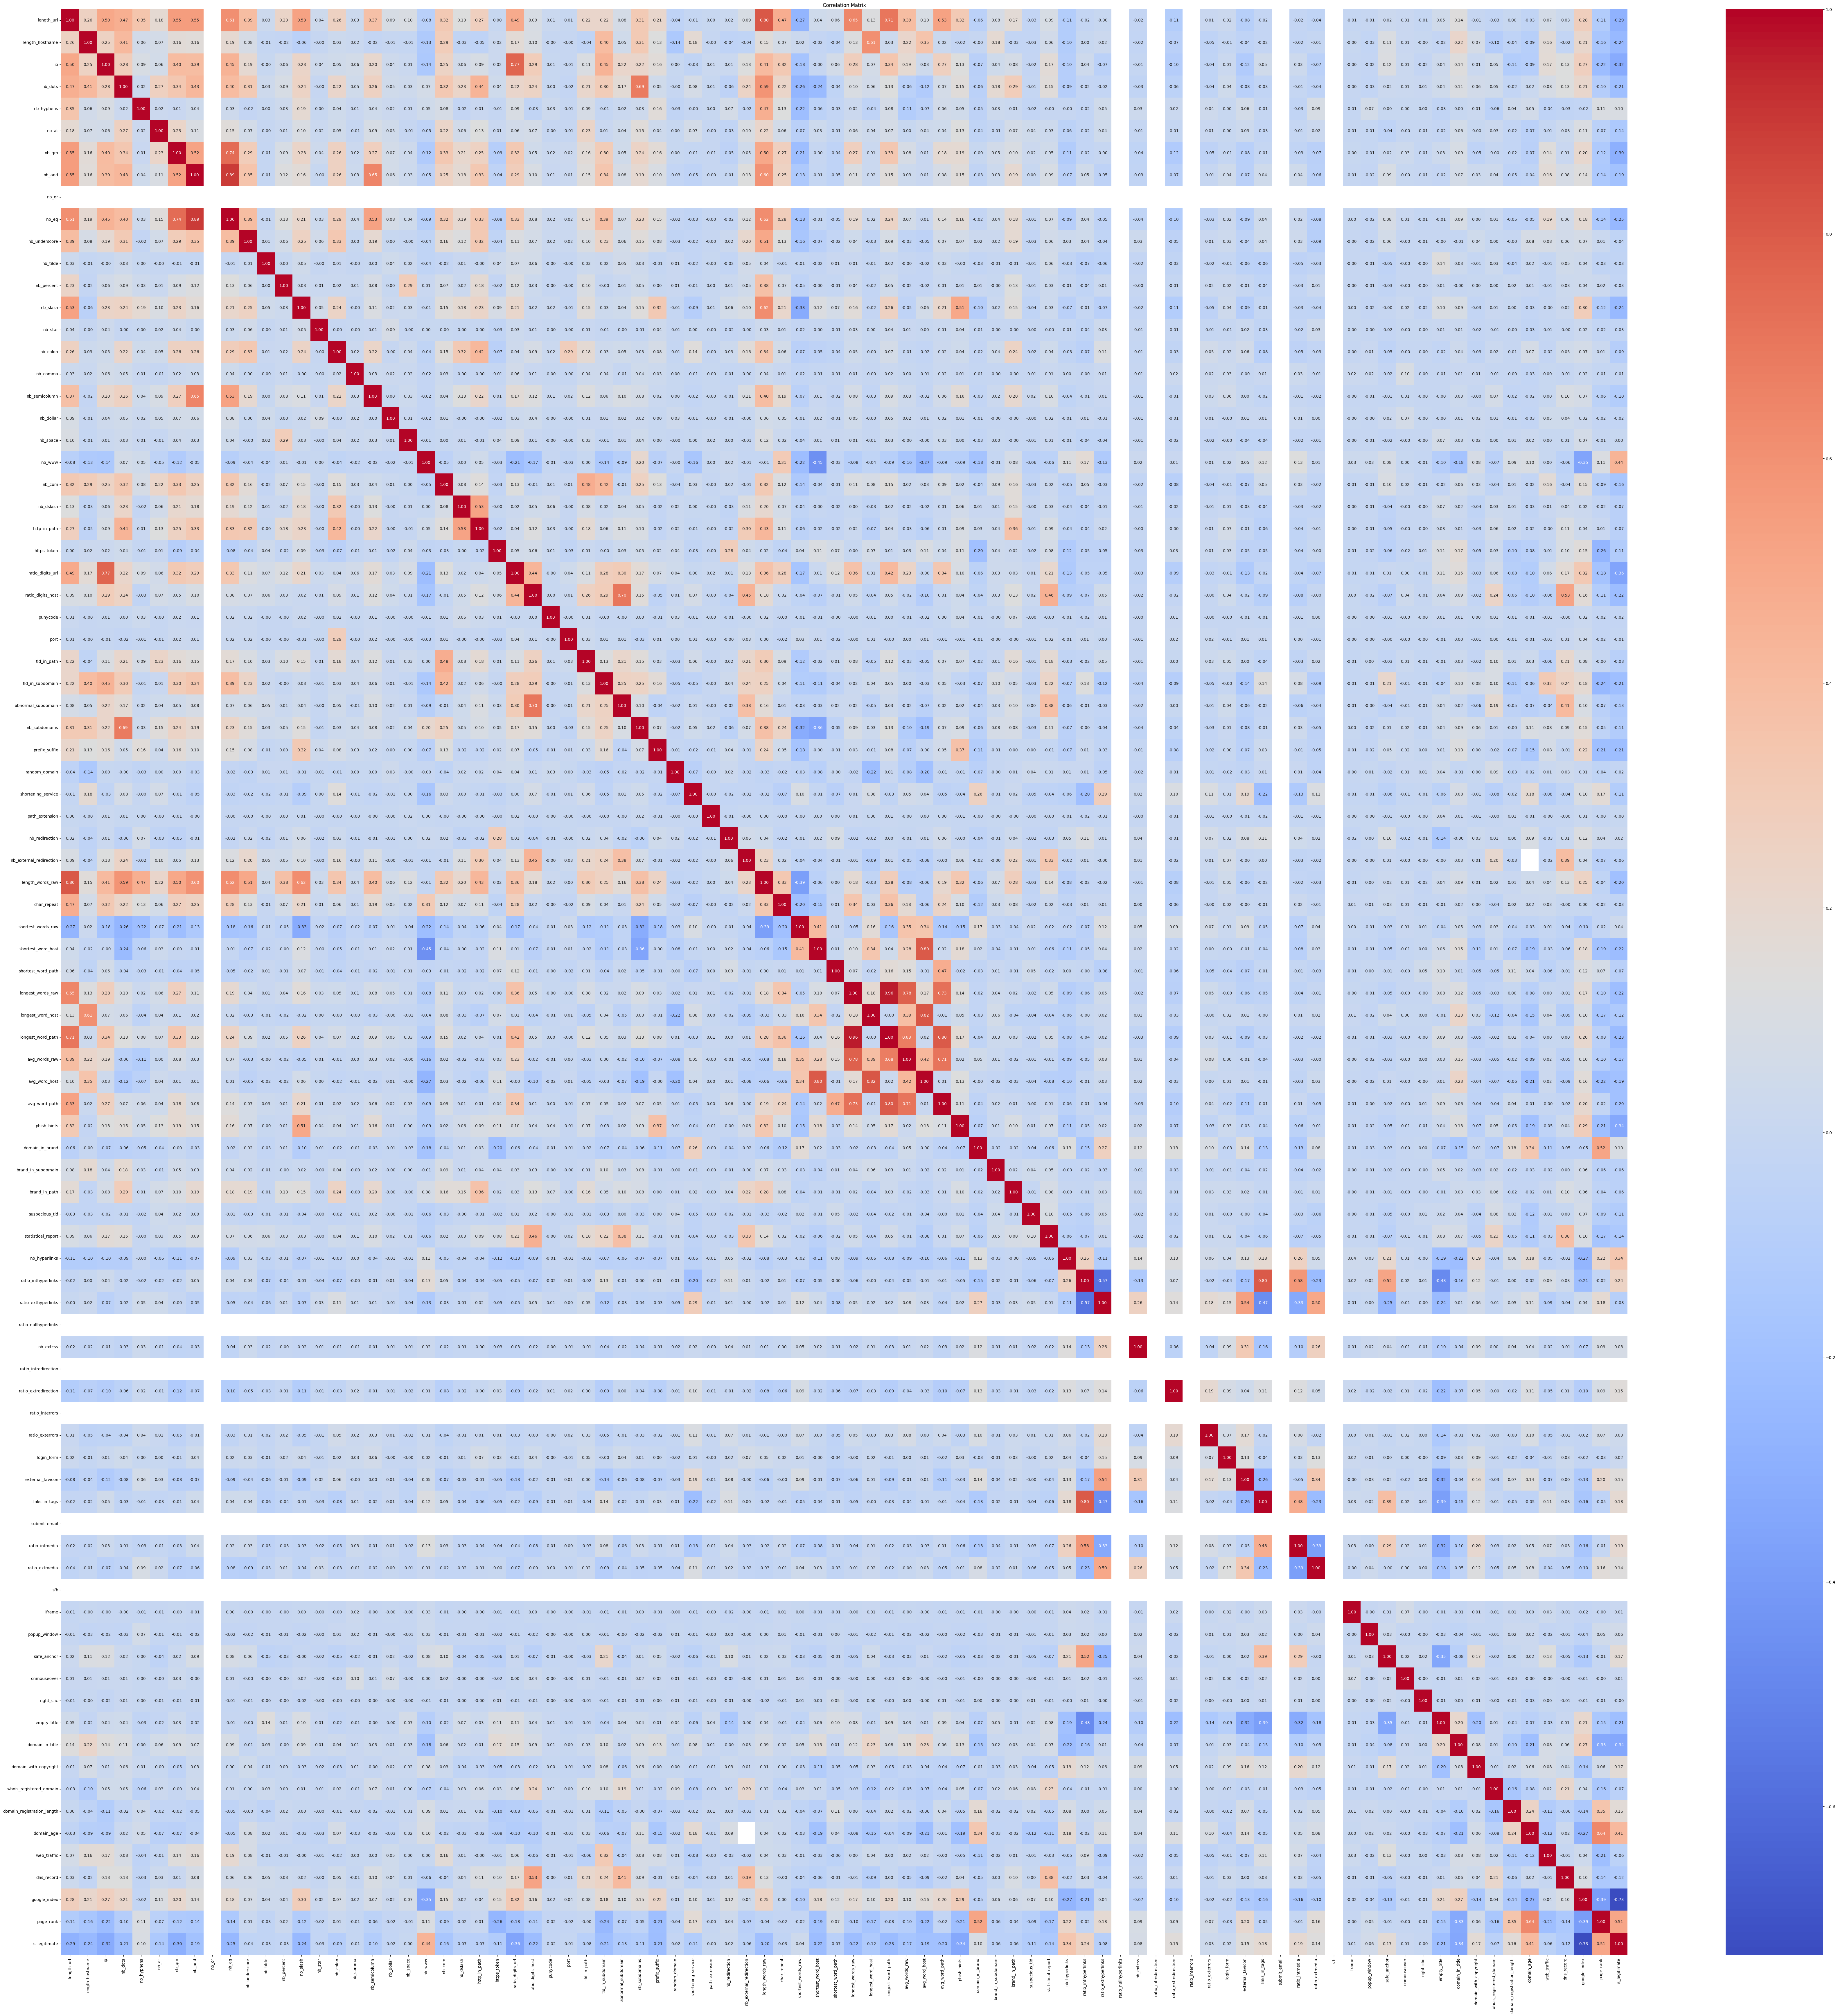

In [52]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(87, 87))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Selected features based on Coorelation Matrix: page_rank,google_index,domain_age,phish_hints,ratio_digits_url,nb_www,ip,nb_qm

Removing Unnecessary columns based on Coorelation Matrix where values w.r.t target variable(is_legitimate) and setting threshold to drop is between -0.05 and 0.05 representing weak relationships

In [53]:
correlation_with_target = df.corr()['is_legitimate'].drop('is_legitimate')
columns_to_drop = correlation_with_target[correlation_with_target.isnull()].index
# Drop columns from DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)

<ipython-input-53-409422b4eebc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['is_legitimate'].drop('is_legitimate')


In [54]:
correlation_with_target = df.corr()['is_legitimate'].drop('is_legitimate')
columns_to_drop = correlation_with_target[(correlation_with_target > -0.05) & (correlation_with_target < 0.05)].index
df.drop(columns_to_drop, axis=1, inplace=True)

<ipython-input-54-e261651e0d56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['is_legitimate'].drop('is_legitimate')


In [55]:
correlations = df.corrwith(df['is_legitimate'])

# Display correlations
for feature, correlation in correlations.items():
    print(f"'{feature}': {correlation}")

'length_url': -0.28553037756077876
'length_hostname': -0.23839444049743058
'ip': -0.3222853980839969
'nb_dots': -0.2073152404534146
'nb_hyphens': 0.10436463837407886
'nb_at': -0.14309194786398968
'nb_qm': -0.2951271761249214
'nb_and': -0.18530028163623868
'nb_eq': -0.247763901891724
'nb_slash': -0.24334913411712145
'nb_colon': -0.09393196566995522
'nb_semicolumn': -0.10335194248443468
'nb_www': 0.4442867995858403
'nb_com': -0.1582156953764087
'nb_dslash': -0.07147968489359156
'http_in_path': -0.07207874417339327
'https_token': -0.11424386641965906
'ratio_digits_url': -0.35834928386754855
'ratio_digits_host': -0.224275685260453
'tld_in_path': -0.08106073852256121
'tld_in_subdomain': -0.20915912146538768
'abnormal_subdomain': -0.12832982006554336
'nb_subdomains': -0.11258119426358464
'prefix_suffix': -0.21458418837315846
'shortening_service': -0.10766307759309124
'nb_external_redirection': -0.05627902712906626
'length_words_raw': -0.20325955848002827
'shortest_word_host': -0.223084923027

<ipython-input-55-32e4bca9452a>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df['is_legitimate'])


EDA Step 2:Mean Plot

<ipython-input-56-c97a45a3689c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


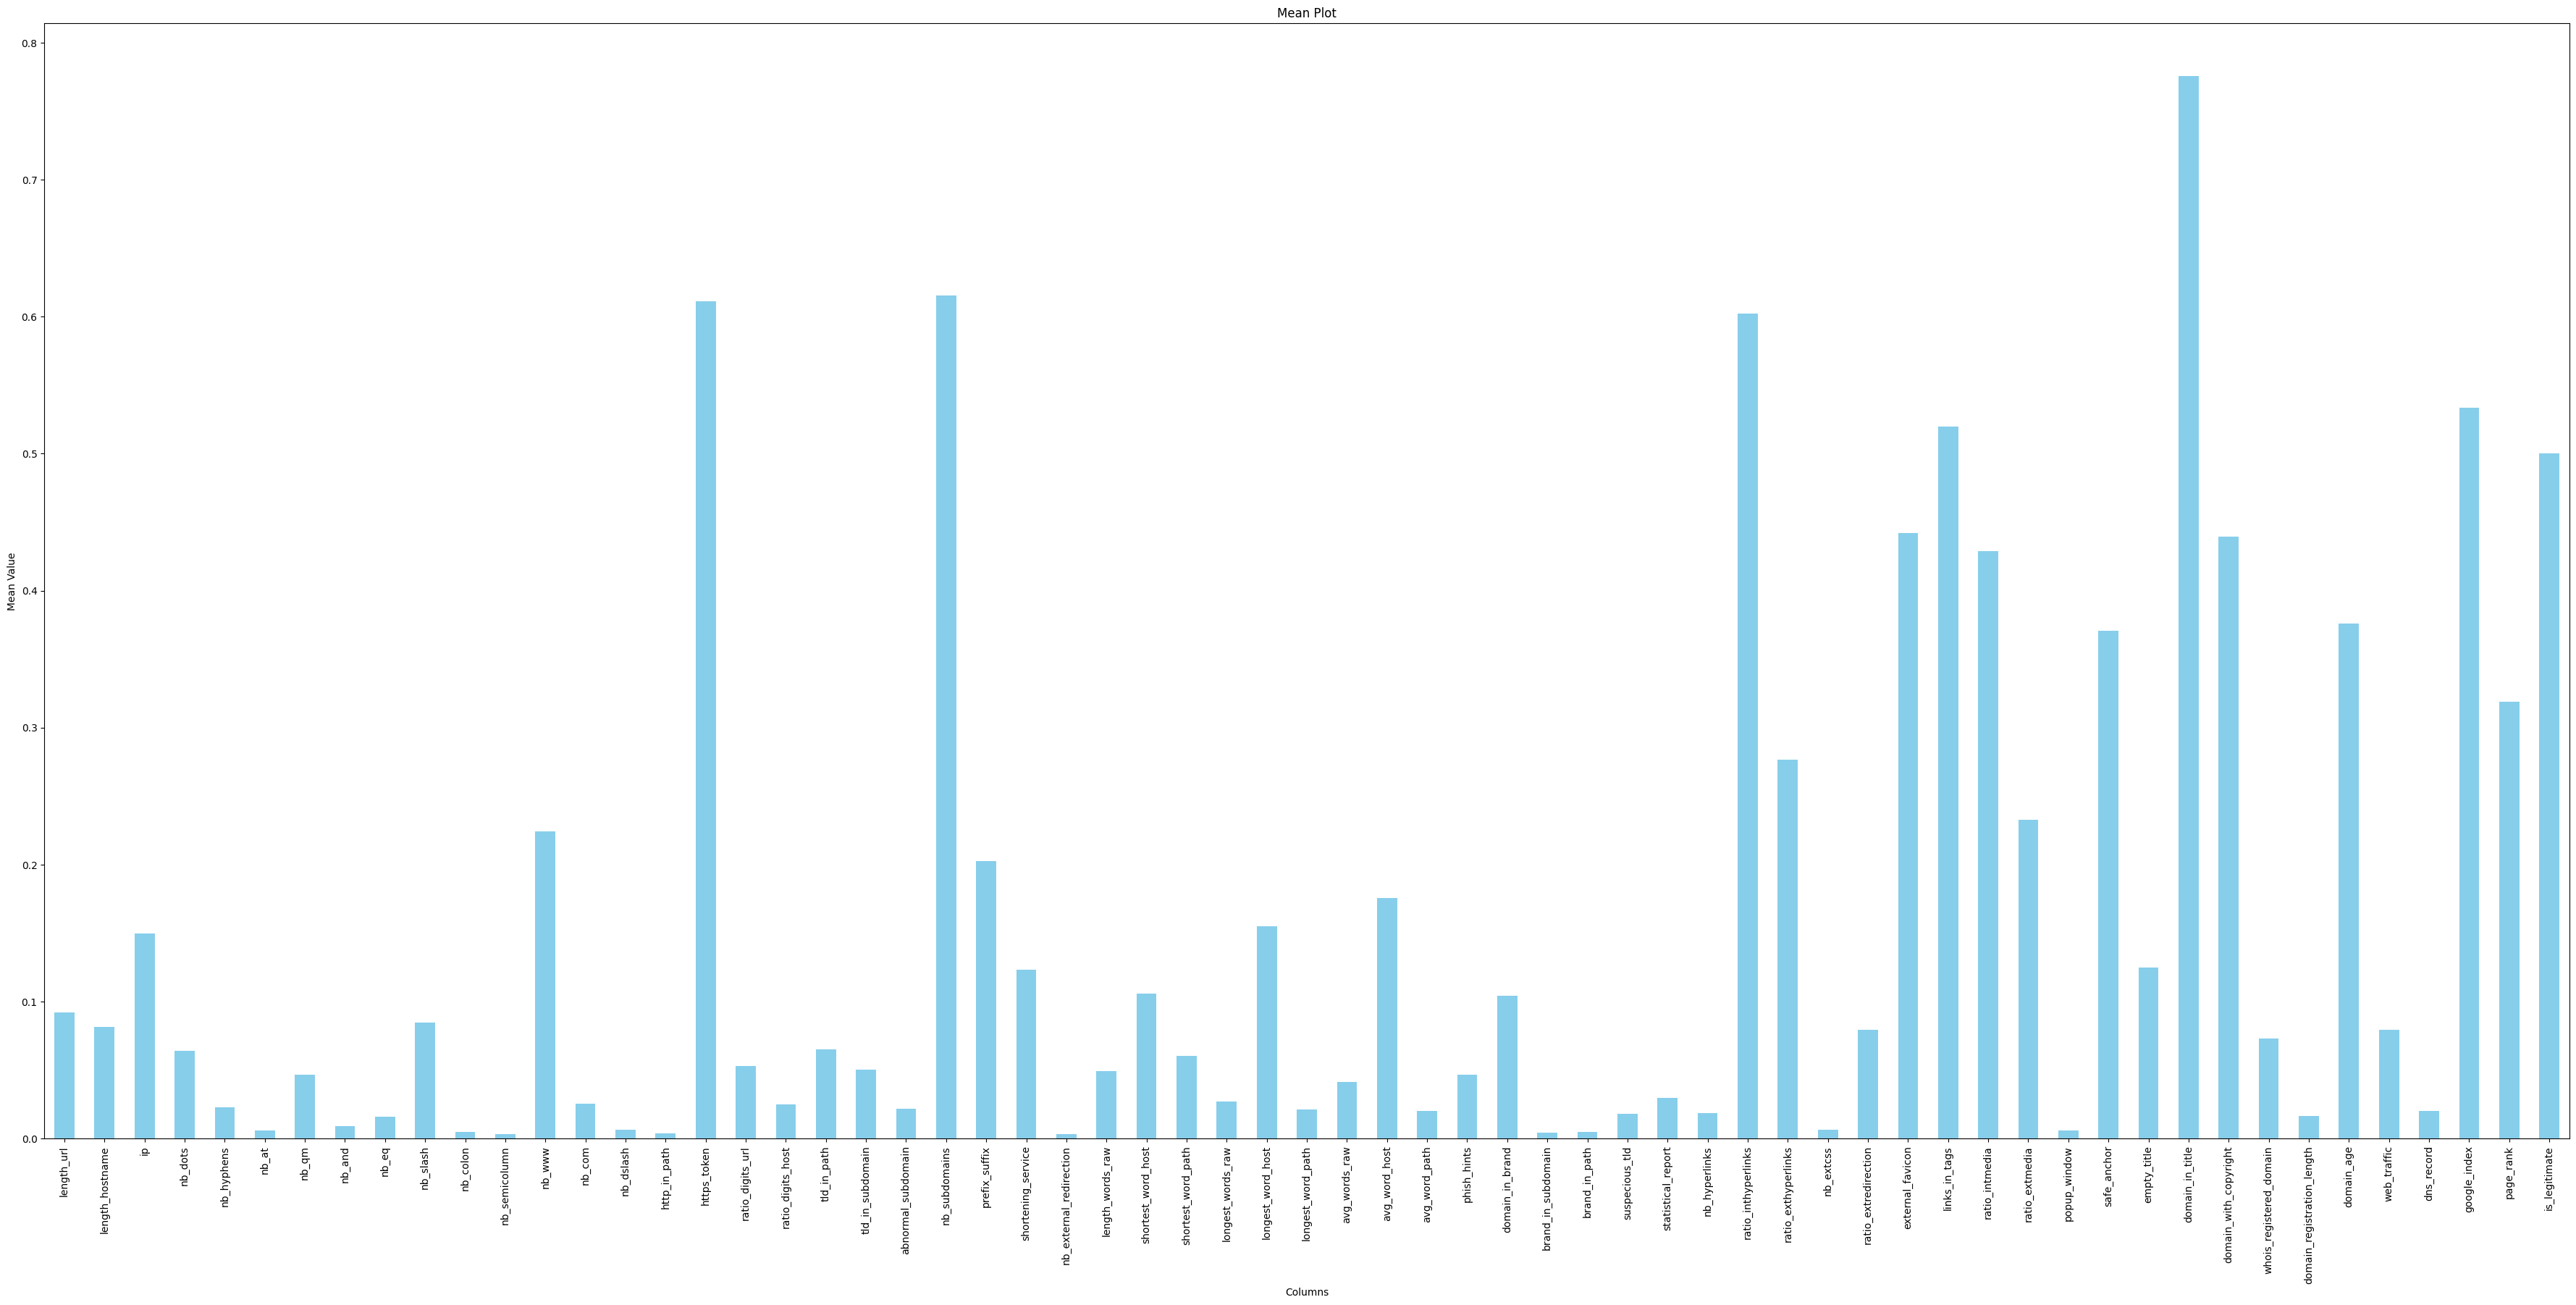

In [56]:
mean_values = df.mean()
plt.figure(figsize=(45, 20))
mean_values.plot(kind='bar', color='skyblue')
plt.title('Mean Plot')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.show()

Selecting Feature Based on Mean plot with the Highest mean :domain_in_title

EDA Step 3:Standard Deviation Plot

<ipython-input-57-27df91208aa6>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_values = df.std()


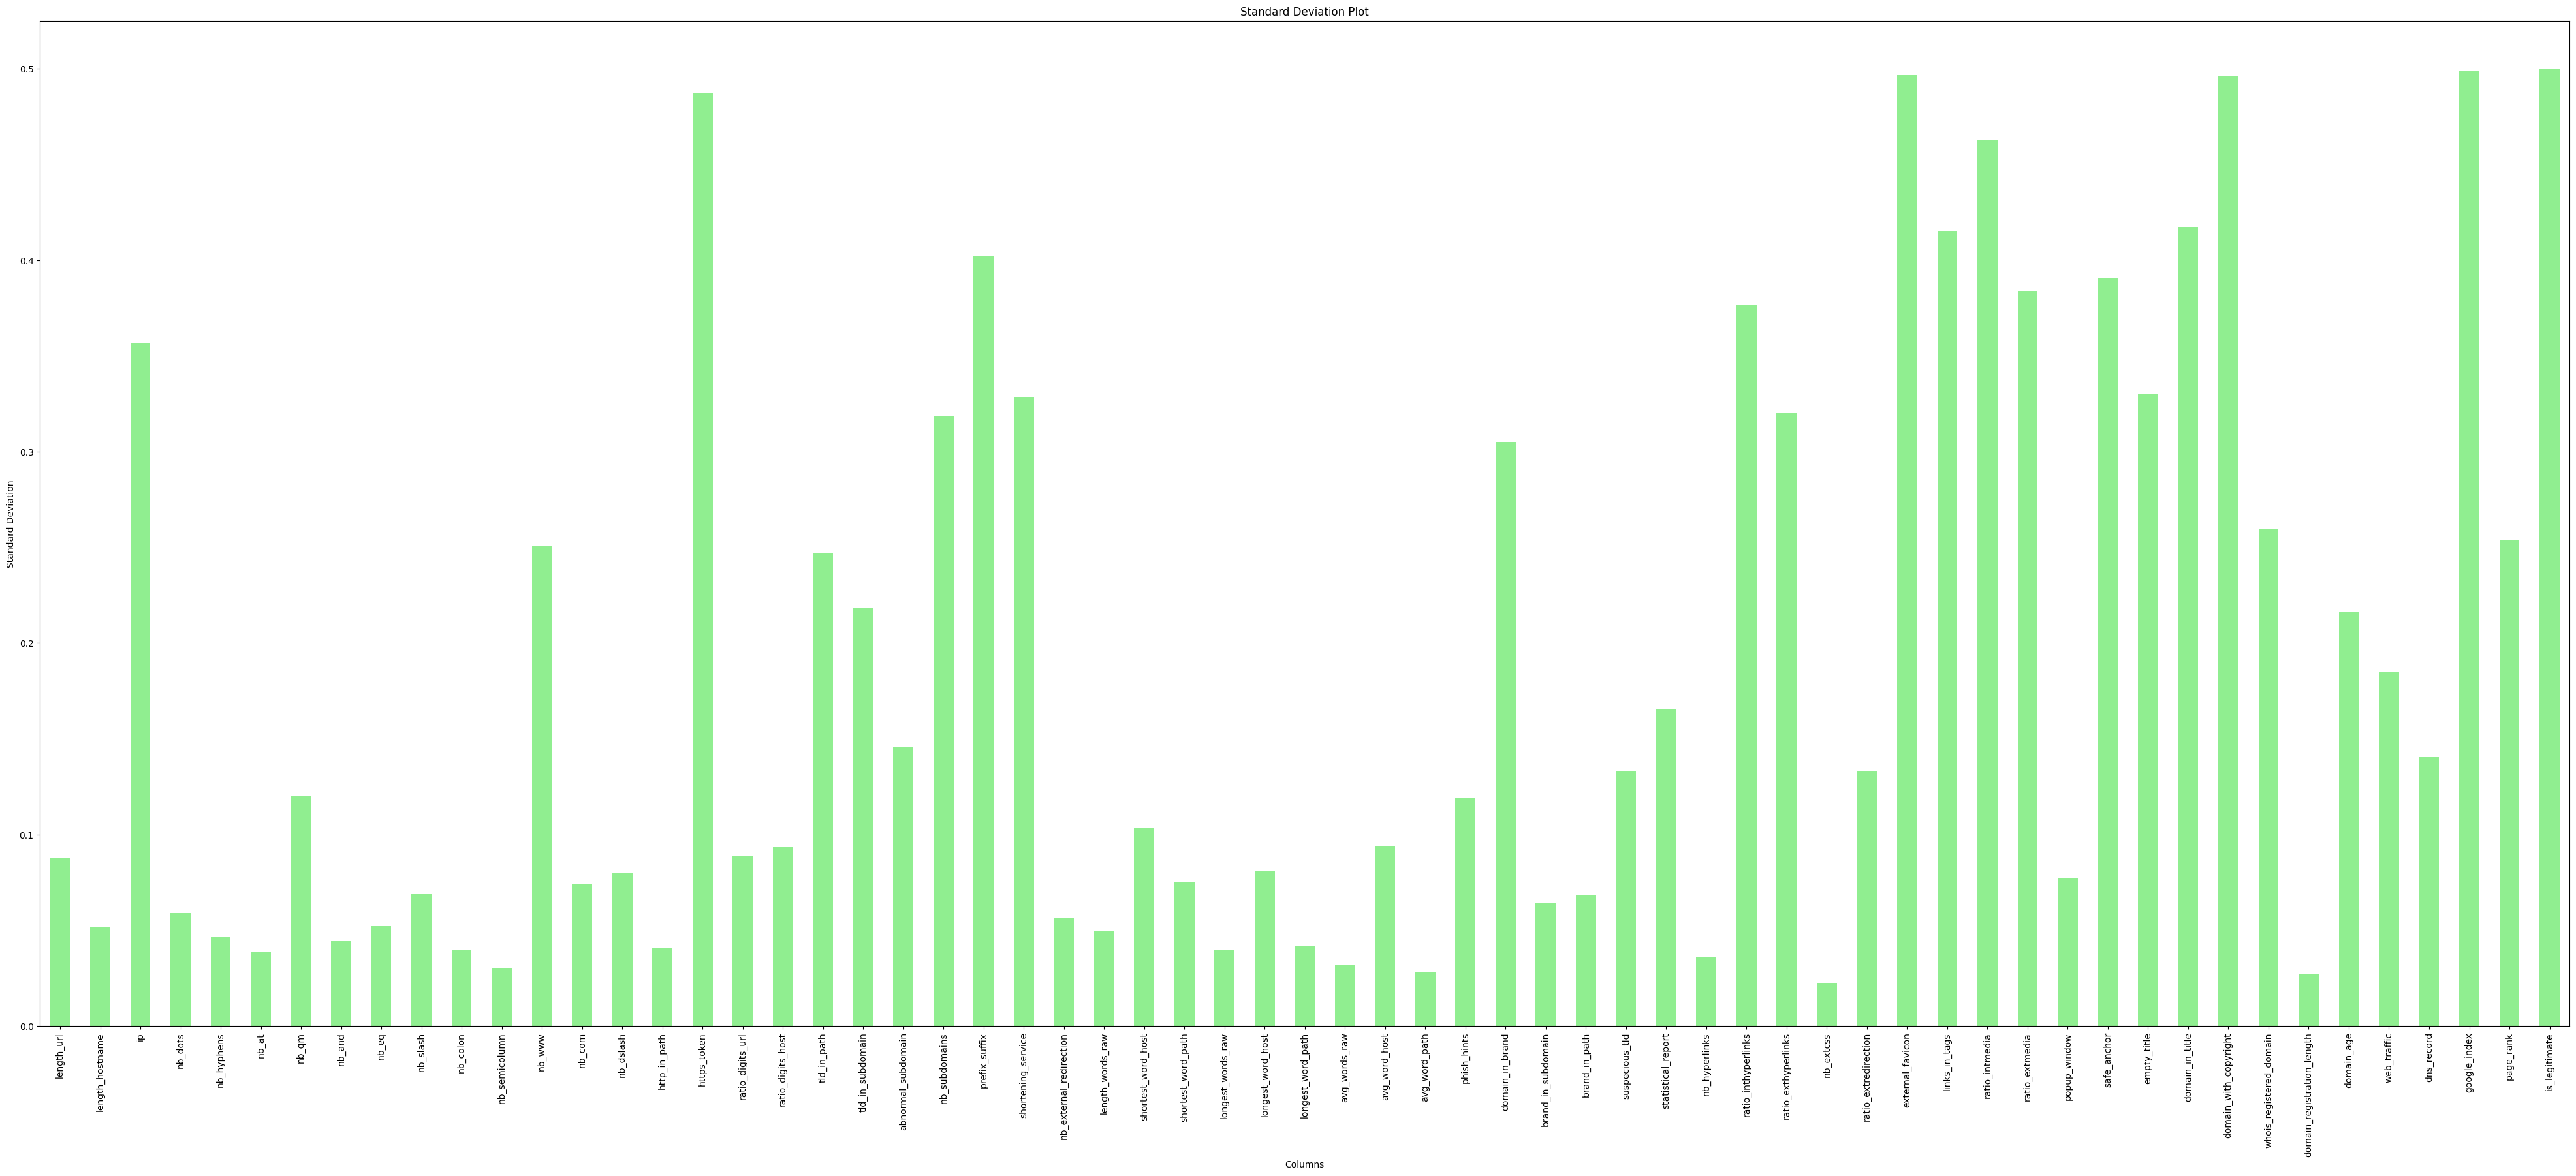

In [57]:
std_values = df.std()
plt.figure(figsize=(50, 20))  # Adjust the figure size if needed
std_values.plot(kind='bar', color='lightgreen')
plt.title('Standard Deviation Plot')
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.show()

Selecting Features based on standard deviation plot: google_index,domain_with_copyright,external_favicon,https_token,nb_hyperlinks

In [58]:
skewness = df.skew()

# Print skewness for each column
print("Skewness for each column:")
print(skewness)

Skewness for each column:
length_url         3.616078
length_hostname    5.164865
ip                 1.965567
nb_dots            5.755064
nb_hyphens         4.298366
                     ...   
web_traffic        2.778710
dns_record         6.830733
google_index      -0.134542
page_rank          0.445572
is_legitimate     -0.001051
Length: 63, dtype: float64


<ipython-input-58-bc9ea3f7591e>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


Finalizing the Interested features from Coorelation matrix,Mean Plot and Standard deviation Plot as well as adding in features which we think might be useful in analyzing

In [59]:
df1 = df[['google_index','domain_with_copyright','external_favicon','https_token','nb_hyperlinks','domain_in_title','page_rank','domain_age','phish_hints','ratio_digits_url','nb_www','ip','nb_qm','length_hostname','nb_dots','web_traffic']]
df1.describe()

google_index  domain_with_copyright  external_favicon   https_token  \
count  11414.000000           11414.000000      11414.000000  11414.000000   
mean       0.533555               0.439460          0.442176      0.611179   
std        0.498895               0.496343          0.496667      0.487504   
min        0.000000               0.000000          0.000000      0.000000   
25%        0.000000               0.000000          0.000000      0.000000   
50%        1.000000               0.000000          0.000000      1.000000   
75%        1.000000               1.000000          1.000000      1.000000   
max        1.000000               1.000000          1.000000      1.000000   

       nb_hyperlinks  domain_in_title     page_rank   domain_age  \
count   11414.000000     11414.000000  11414.000000  9579.000000   
mean        0.018738         0.775539      0.318714     0.376096   
std         0.035812         0.417245      0.253759     0.216107   
min         0.000000         0.000000      0.000000     0.000000   
25%         0.001932         1.000000      0.100000     0.188791   
50%         0.007298         1.000000      0.300000     0.394283   
75%         0.021839         1.000000      0.500000     0.566180   
max         1.000000         1.000000      1.000000     1.000000   

        phish_hints  ratio_digits_url        nb_www            ip  \
count  11414.000000      11414.000000  11414.000000  11414.000000   
mean       0.046434          0.052835      0.224374      0.149553   
std        0.118930          0.088895      0.250974      0.356649   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.000000          0.000000      0.000000      0.000000   
50%        0.000000          0.000000      0.000000      0.000000   
75%        0.000000          0.078947      0.500000      0.000000   
max        1.000000          0.652344      1.000000      1.000000   

              nb_qm  length_hostname       nb_dots   web_traffic  
count  11414.000000     11414.000000  11414.000000  11414.000000  
mean       0.046551         0.081353      0.064189      0.079524  
std        0.120416         0.051323      0.059091      0.185141  
min        0.000000         0.000000      0.000000      0.000000  
25%        0.000000         0.052381      0.043478      0.000000  
50%        0.000000         0.071429      0.043478      0.000156  
75%        0.000000         0.095238      0.086957      0.034844  
max        1.000000         1.000000      1.000000      1.000000

EDA Step 4:Histogram Between selected features

array([[<Axes: title={'center': 'google_index'}>,
        <Axes: title={'center': 'domain_with_copyright'}>,
        <Axes: title={'center': 'external_favicon'}>,
        <Axes: title={'center': 'https_token'}>],
       [<Axes: title={'center': 'nb_hyperlinks'}>,
        <Axes: title={'center': 'domain_in_title'}>,
        <Axes: title={'center': 'page_rank'}>,
        <Axes: title={'center': 'domain_age'}>],
       [<Axes: title={'center': 'phish_hints'}>,
        <Axes: title={'center': 'ratio_digits_url'}>,
        <Axes: title={'center': 'nb_www'}>,
        <Axes: title={'center': 'ip'}>],
       [<Axes: title={'center': 'nb_qm'}>,
        <Axes: title={'center': 'length_hostname'}>,
        <Axes: title={'center': 'nb_dots'}>,
        <Axes: title={'center': 'web_traffic'}>]], dtype=object)

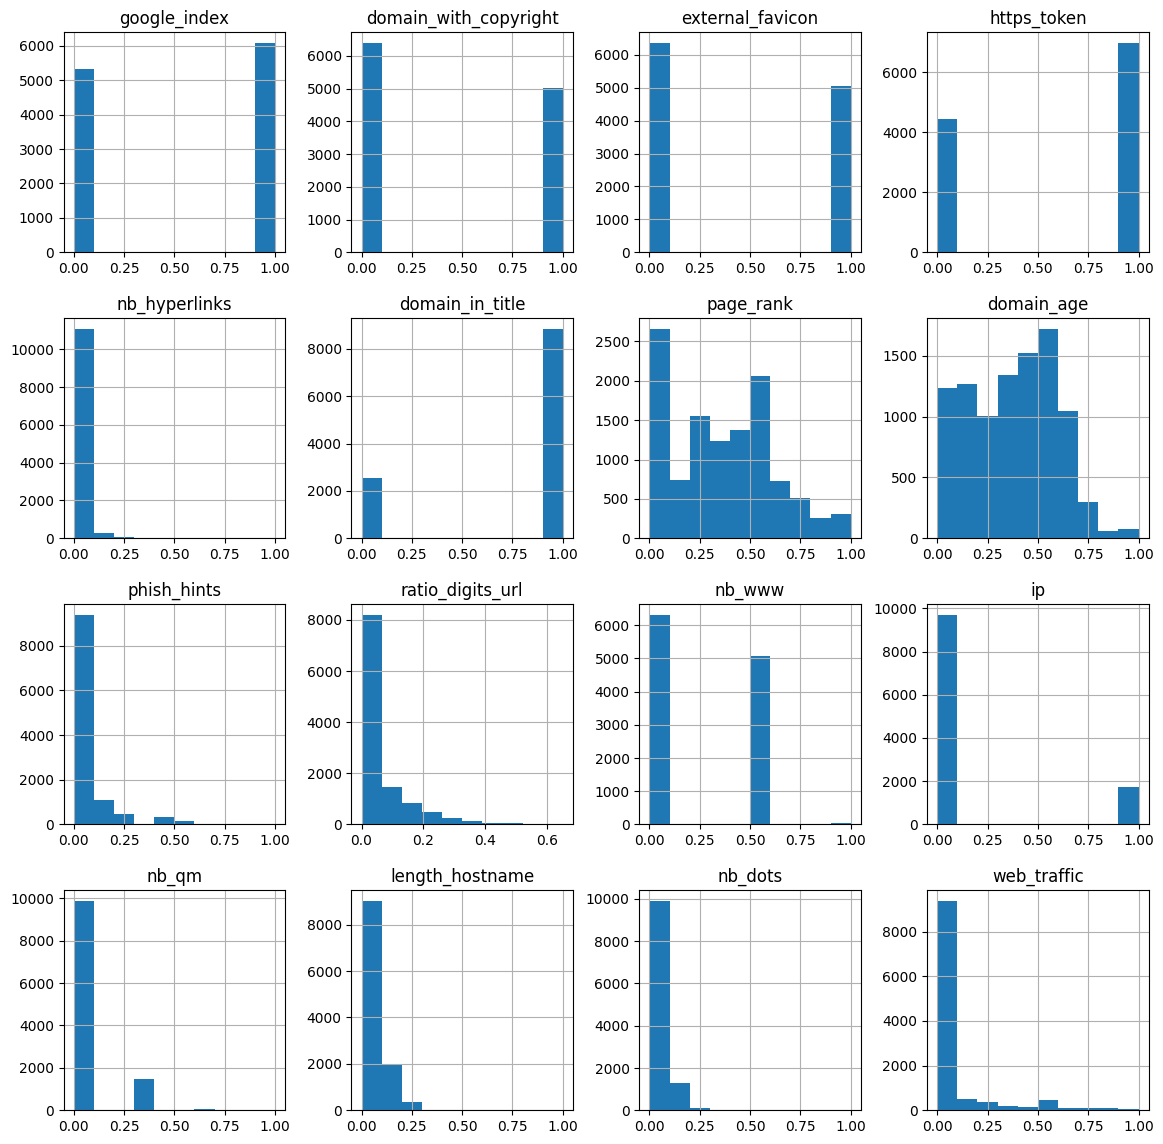

In [60]:
df1.hist(figsize=(14,14))

EDA Step 5:BiHistogram For the feature domain_age

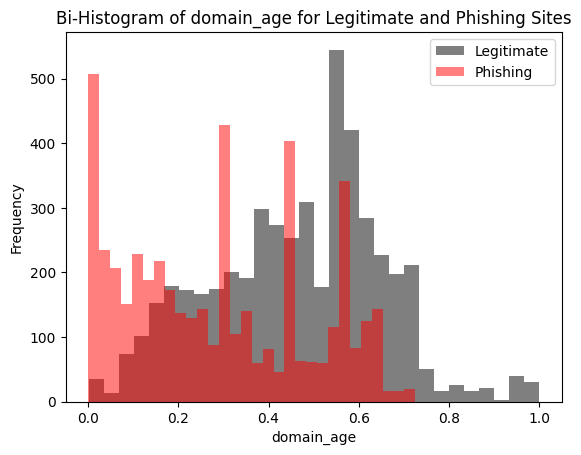

In [61]:
legitimate_traffic = df[df['is_legitimate'] == 1]['domain_age']
phishing_traffic = df[df['is_legitimate'] == 0]['domain_age']


plt.hist(legitimate_traffic, bins=30, alpha=0.5, label='Legitimate', color='black')
plt.hist(phishing_traffic, bins=30, alpha=0.5, label='Phishing', color='red')

# Add labels and title
plt.xlabel('domain_age')
plt.ylabel('Frequency')
plt.title('Bi-Histogram of domain_age for Legitimate and Phishing Sites')
plt.legend()

# Display the plot
plt.show()


EDA Step 6:Box plot between Google index and Domain age

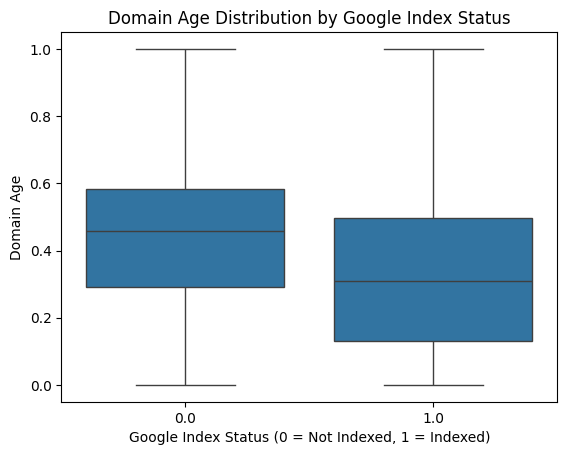

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='google_index', y='domain_age', data=df)
plt.title('Domain Age Distribution by Google Index Status')
plt.xlabel('Google Index Status (0 = Not Indexed, 1 = Indexed)')
plt.ylabel('Domain Age')
plt.show()

EDA Step 7:Violin Plot for page rank with respective to target variable

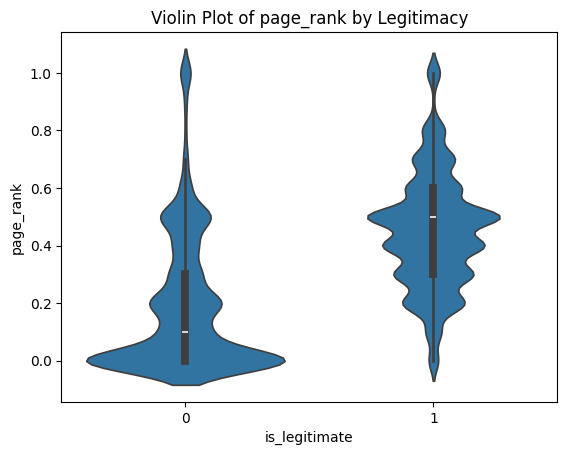

In [63]:
sns.violinplot(x='is_legitimate', y='page_rank', data=df)
plt.title(f'Violin Plot of page_rank by Legitimacy')
plt.show()

EDA Step 8:Bargraph of www parameter within URL

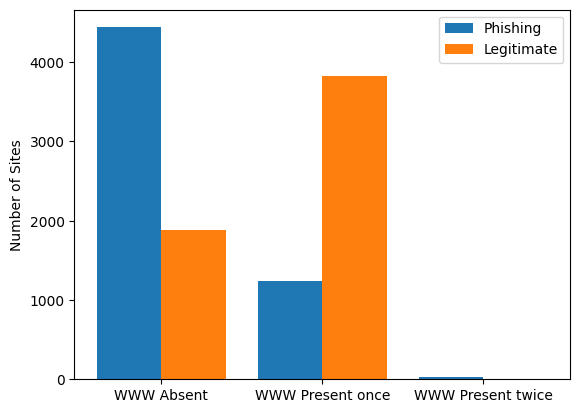

In [64]:
red_points = df[df['is_legitimate'] == 0]
blue_points = df[df['is_legitimate'] == 1]
X = ['WWW Absent', 'WWW Present once', 'WWW Present twice']
phi = [red_points[red_points['nb_www']==0].shape[0],red_points[red_points['nb_www']==0.5].shape[0],red_points[red_points['nb_www']==1].shape[0]]
leg = [blue_points[blue_points['nb_www']==0].shape[0],blue_points[blue_points['nb_www']==0.5].shape[0],blue_points[blue_points['nb_www']==1].shape[0]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, phi, 0.4, label = 'Phishing')
plt.bar(X_axis + 0.2, leg, 0.4, label = 'Legitimate')

plt.xticks(X_axis, X)
plt.ylabel("Number of Sites")
plt.legend()
plt.show()

EDA Step 9: Scatter Plots between page_rank and no of question marks

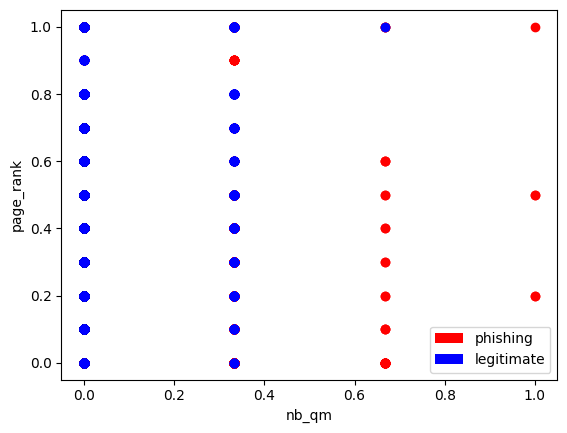

In [65]:


red_points = df[df['is_legitimate'] == 0]
blue_points = df[df['is_legitimate'] == 1]

# Plotting
plt.scatter(red_points['nb_qm'], red_points['page_rank'], color='red', label='Red')
plt.scatter(blue_points['nb_qm'], blue_points['page_rank'], color='blue', label='Blue')

# Labeling and legend
plt.xlabel('nb_qm')
plt.ylabel('page_rank')
legend_elements = [
    Patch(facecolor='red', label='phishing'),
    Patch(facecolor='blue', label='legitimate')
]
plt.legend(handles=legend_elements)
# Show plot
plt.show()

EDA Step 10: Scatter Plots between phish_hints and domain_age

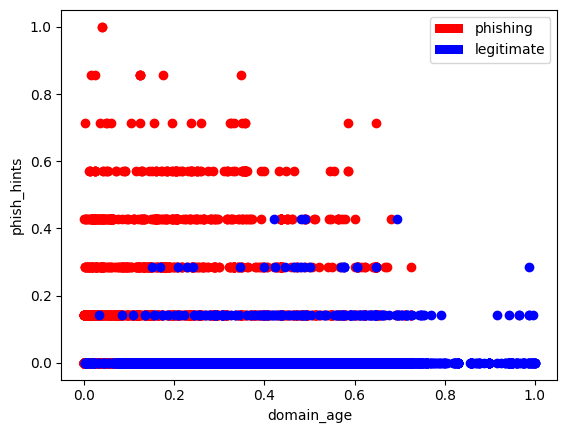

In [67]:
red_points = df[df['is_legitimate'] == 0]
blue_points = df[df['is_legitimate'] == 1]

# Plotting
plt.scatter(red_points['domain_age'], red_points['phish_hints'], color='red', label='Red')
plt.scatter(blue_points['domain_age'], blue_points['phish_hints'], color='blue', label='Blue')

# Labeling and legend
plt.xlabel('domain_age')
plt.ylabel('phish_hints')
legend_elements = [
    Patch(facecolor='red', label='phishing'),
    Patch(facecolor='blue', label='legitimate')
]
plt.legend(handles=legend_elements)
# Show plot
plt.show()